<a href="https://colab.research.google.com/github/Salwalabibah/PCVK_Genap_2023/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
from google.colab.patches import cv2_imshow
from skimage import io
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

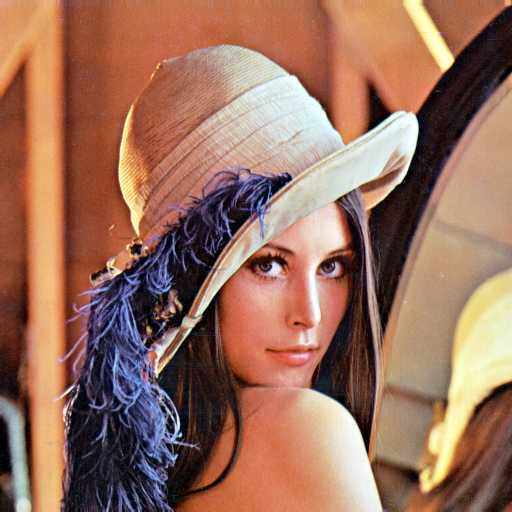

<BarContainer object of 256 artists>

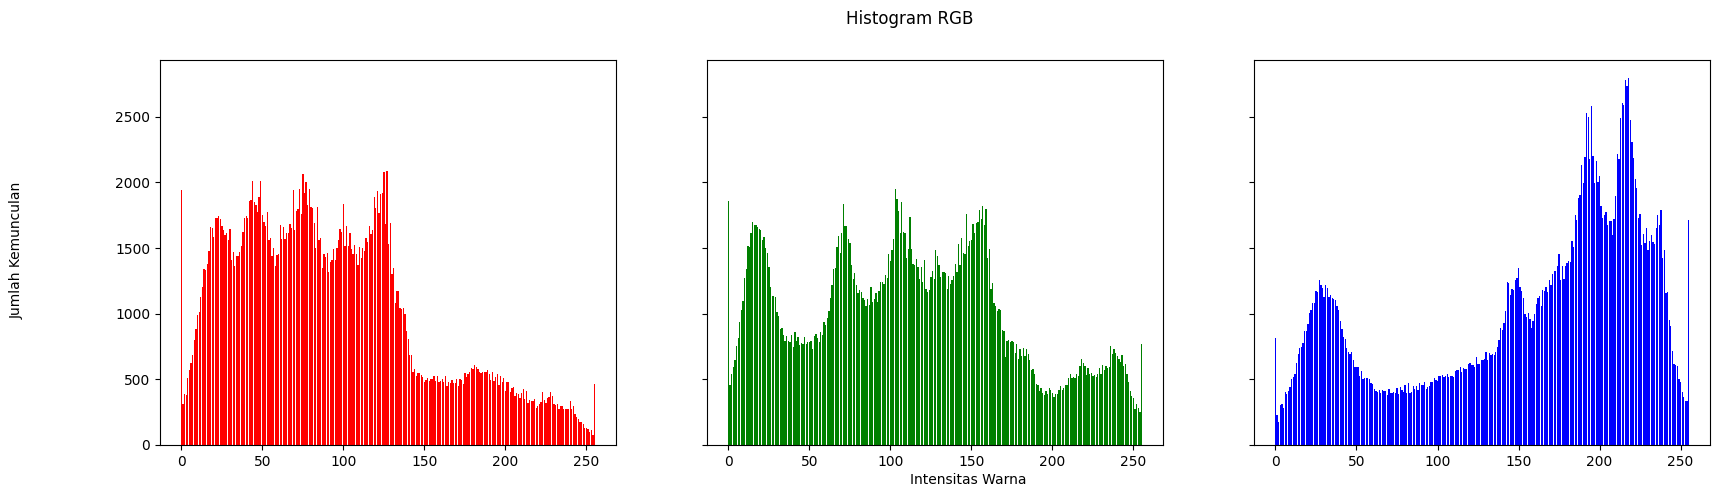

In [43]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg')

R = [0]*256
G = [0]*256
B = [0]*256

height, width, channel = img1.shape
for y in range (height):
  for x in range (width):
    R[img1[y][x][0]] += 1
    G[img1[y][x][1]] += 1
    B[img1[y][x][2]] += 1

cv2_imshow(img1)
intensitas = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', va='center')
axs[0].bar(intensitas, R, color='Red')
axs[1].bar(intensitas, G, color='Green')
axs[2].bar(intensitas, B, color='Blue')


<function matplotlib.pyplot.show(close=None, block=None)>

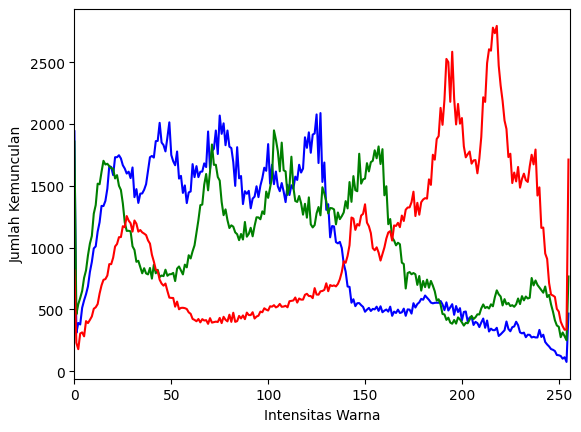

In [44]:
colors = ("b", "g", "r")
channel = (0, 1, 2)

# Membuat Histogram Plot
plt.xlim([0, 256])
for channel, c in zip(channel, colors):
  histogram, bin_edges = np.histogram(
      img1[:, :, channel], bins = 256, range = (0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

plt.show

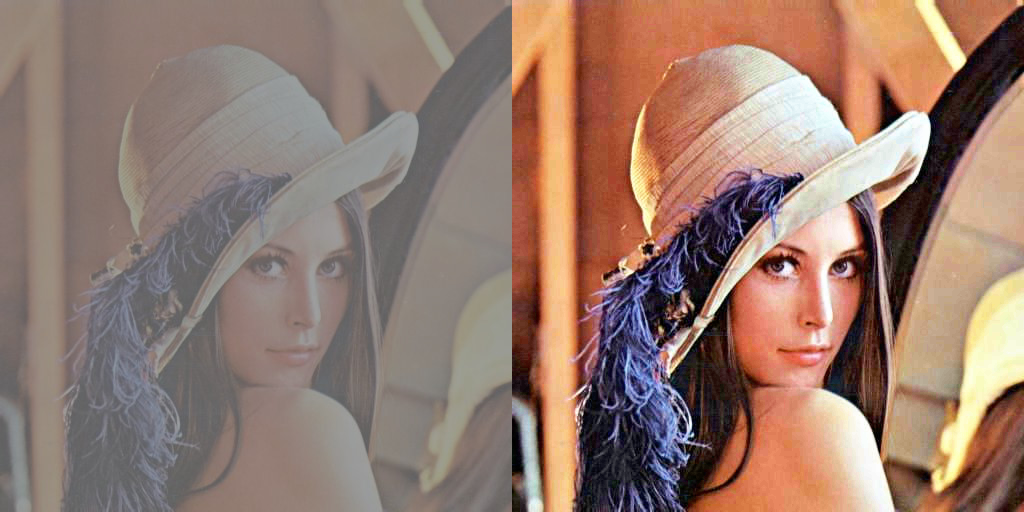

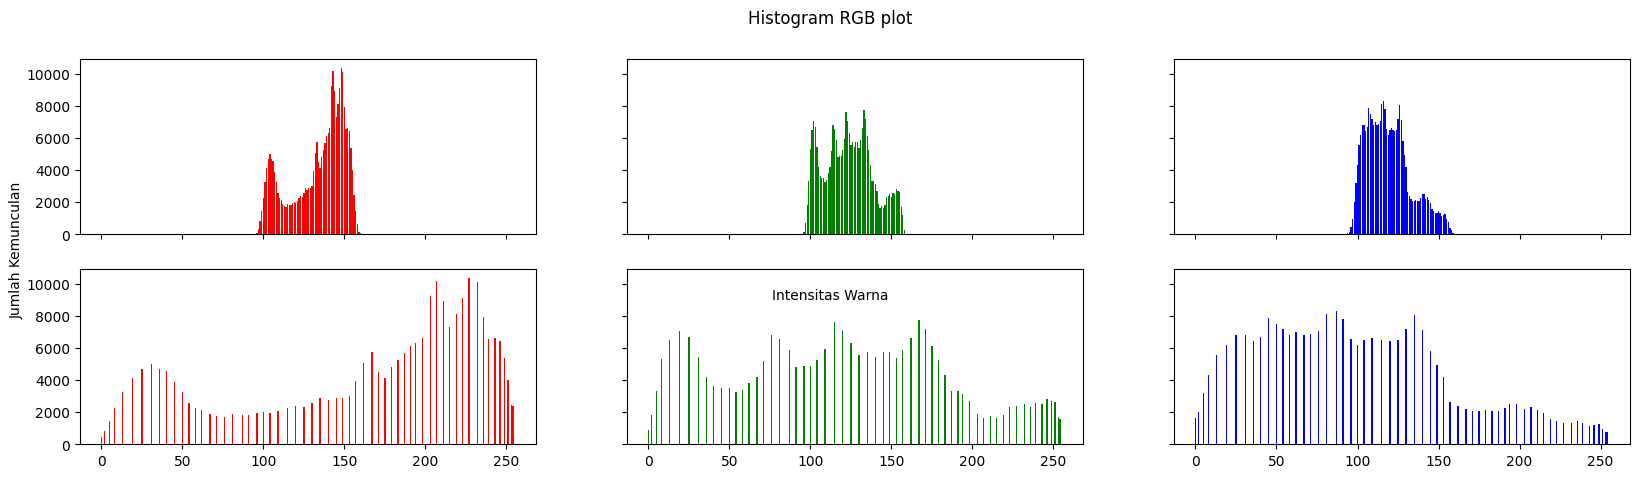

In [45]:
img2 = cv.imread('/content/drive/MyDrive/PCVK/img/lena_lc.jpg')
def histog(img):
  height, width, channel = np.shape(img)
  ax = np.zeros((3, 256))
  for y in range(0, height):
    for x in range(0, width):
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

real_histo = histog(img2)

#convert to array
img_array = np.asarray(img2)

#normalisasi kamulatif histogram
hist_array = np.bincount(img_array.flatten(), minlength=256)
num_pixels = np.sum(hist_array)
hist_array = hist_array/num_pixels

chist_array = np.cumsum(hist_array)

#pixel mapping
transform_map = np.floor(255*chist_array). astype(np.uint8)

#transformation
img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img3 = eq_img_array

equal_histo = histog(img3)

final_frame = cv.hconcat((img2, img3))
cv2_imshow(final_frame)

name = np.arange(256)
grayimg = np.array_equal(B, G, R)
if not grayimg:
   fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
   fig.suptitle('Histogram RGB plot')
   fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
   fig.text(0.5, 0.4, 'Intensitas Warna', ha='center')
   axs[0,0].bar(name, real_histo[2], color='red')
   axs[0,1].bar(name, real_histo[1], color='green')
   axs[0,2].bar(name, real_histo[0], color='blue')
   axs[1,0].bar(name, equal_histo[2], color='red')
   axs[1,1].bar(name, equal_histo[1], color='green')
   axs[1,2].bar(name, equal_histo[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.4, 'Intensitas Warna', ha='center')
  axs[0,0].bar(name, real_histo[2], color='gray')
  axs[0,1].bar(name, equal_histo[2], color='gray')



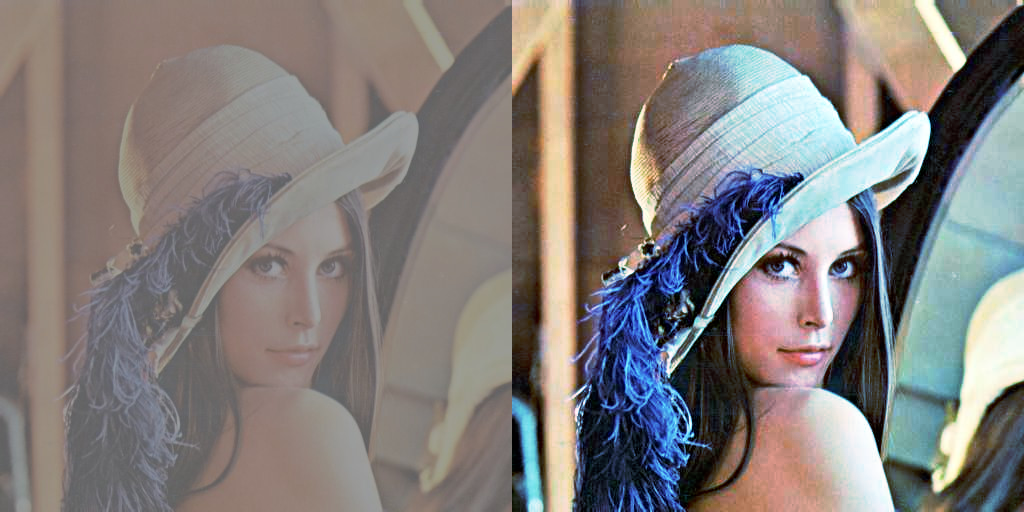

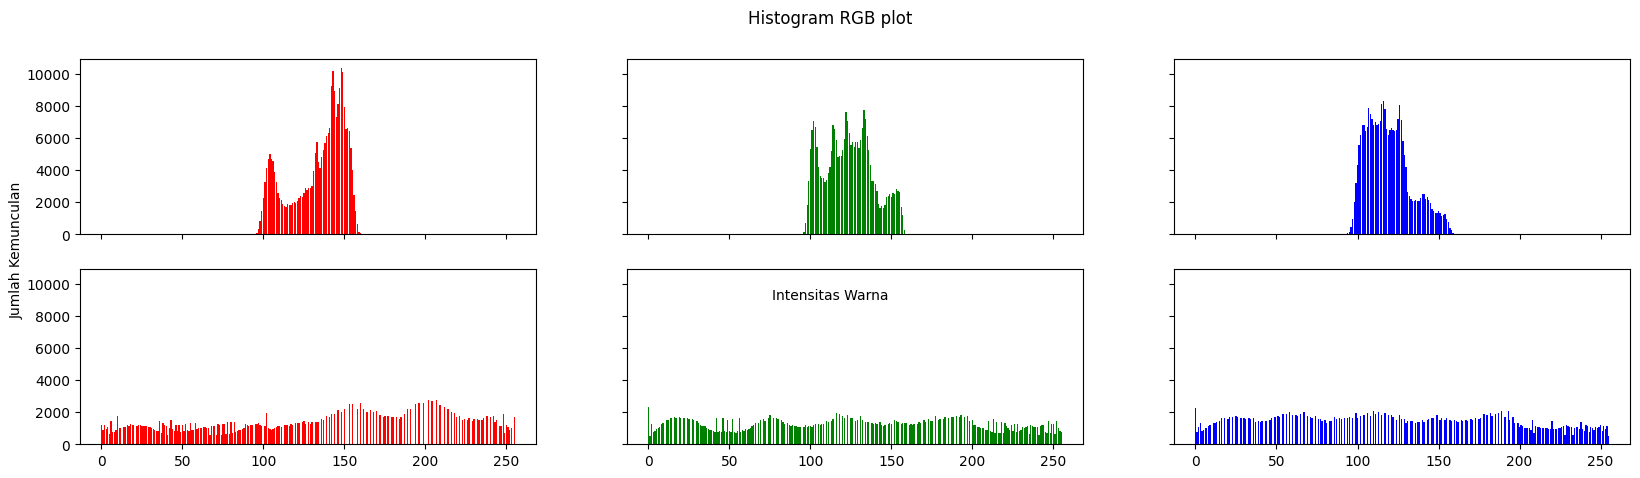

In [48]:
channel = cv.split(img1)
eq_channel = []
for ch, color in zip(channel, ["r", "g", "b"]):
  eq_channel.append(cv.equalizeHist(ch))
eq_img = cv.merge(eq_channel)

equal_histo = histog(eq_img)

final_frame = cv.hconcat((img2, eq_img))
cv2_imshow(final_frame)

name = np.arange(256)
grayimg = np.array_equal(B, G, R)
if not grayimg:
   fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
   fig.suptitle('Histogram RGB plot')
   fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
   fig.text(0.5, 0.4, 'Intensitas Warna', ha='center')
   axs[0,0].bar(name, real_histo[2], color='red')
   axs[0,1].bar(name, real_histo[1], color='green')
   axs[0,2].bar(name, real_histo[0], color='blue')
   axs[1,0].bar(name, equal_histo[2], color='red')
   axs[1,1].bar(name, equal_histo[1], color='green')
   axs[1,2].bar(name, equal_histo[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.4, 'Intensitas Warna', ha='center')
  axs[0,0].bar(name, real_histo[2], color='gray')
  axs[0,1].bar(name, equal_histo[2], color='gray')


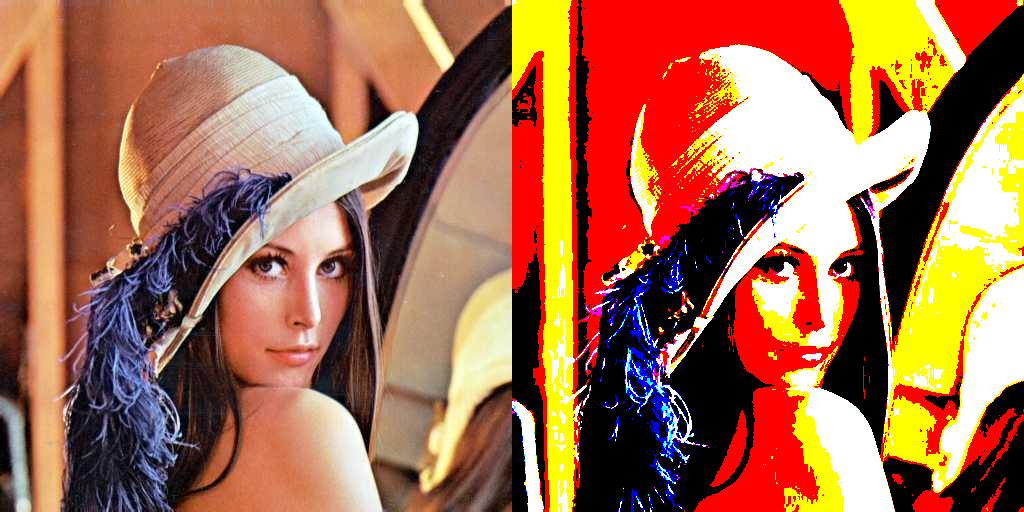

True

In [47]:
img5 = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg')

def warnaTerdekat(r, g, b):
  pvalue = 0
  minDistance =  255*255 + 255*255 + 255*255 + 1
  palleteColor = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0],
   [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(palleteColor)):
    rDiff = r - palleteColor[i][0]
    gDiff = g - palleteColor[i][1]
    bDiff = b - palleteColor[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if(distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

palleteColor = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

height, width, channel = img_16.shape
for y in range(0, height):
  for x in range(0, width):
    new = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = palleteColor[new]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK/img/lena2.jpg', img_8)

In [50]:
from PIL import Image
imgConvert = Image.open('/content/drive/MyDrive/PCVK/img/lena.jpg').convert(
    mode='1',dither=Image.FLOYDSTEINBERG)
imgConvert.save('/content/drive/MyDrive/PCVK/img/testLena.jpg')

In [54]:
img6 = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg')

grayImg = cv.cvtColor(img6, cv.COLOR_BGR2GRAY)
cv.imwrite('/content/drive/MyDrive/PCVK/img/grayLena.jpg', grayImg)

height, width, chennel = grayImg.shape
for y in range(0, height):
  for x in range(0, width):
    oldValue = grayImg[y, x]
    newValue = 0
    if(oldValue > 128):
      newValue = 255

    grayImg[y, x] = newValue
    error = oldValue - newValue

    if (x < width - 1):
      newNumb = grayImg[y, x + 1] + error * 7 / 16
      if (newNumb > 255):
          newNumb = 255
      elif (newNumb < 0):
          ewNumb = 0
      grayImg[y, x + 1] = newNumb

    if (x > 0 and y < height - 1):
      newNumb = grayImg[y + 1, x - 1] + error * 3 / 16
      if (newNumb > 255):
          newNumb = 255
      elif (newNumb < 0):
          newNumb = 0
      grayImg[y + 1, x - 1] = newNumb

    if (y < height - 1):
      newNumb = grayImg[y + 1, x] + error * 5 / 16
      if (newNumb > 255):
          newNumb = 255
      elif (newNumb < 0):
          newNumb = 0
      grayImg[y + 1, x] = newNumb

    if (x < width - 1 and y < height - 1):
      newNumb = grayImg[y + 1, x + 1] + error * 1 / 16
      if (newNumb > 255):
        newNumb = 255
      elif (newNumb < 0):
        newNumb = 0
      grayImg[y + 1, x + 1] = newNumb

cv.imwrite('/content/drive/MyDrive/PCVK/img/ditheredLena.jpg', grayImg)
cv2_imshow(grayImg)





ValueError: ignored